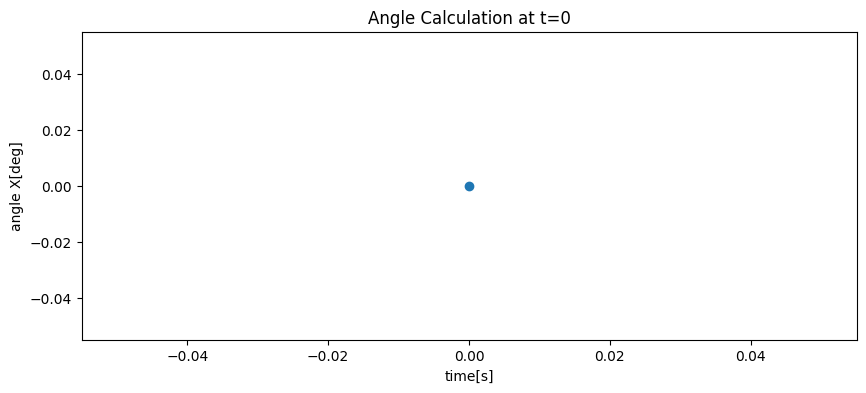

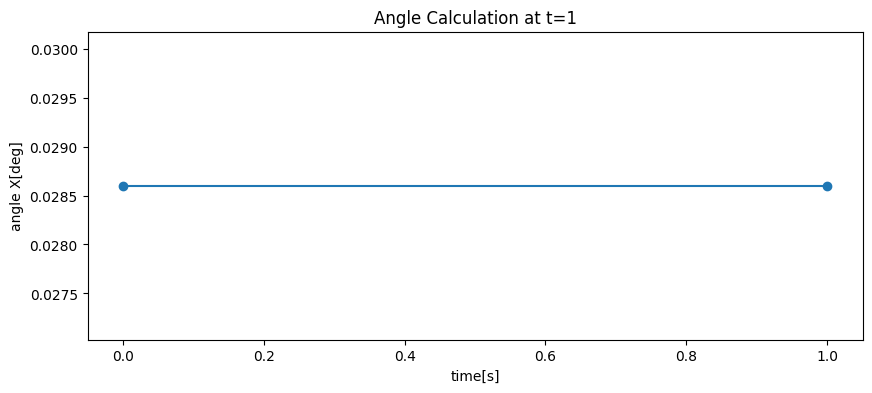

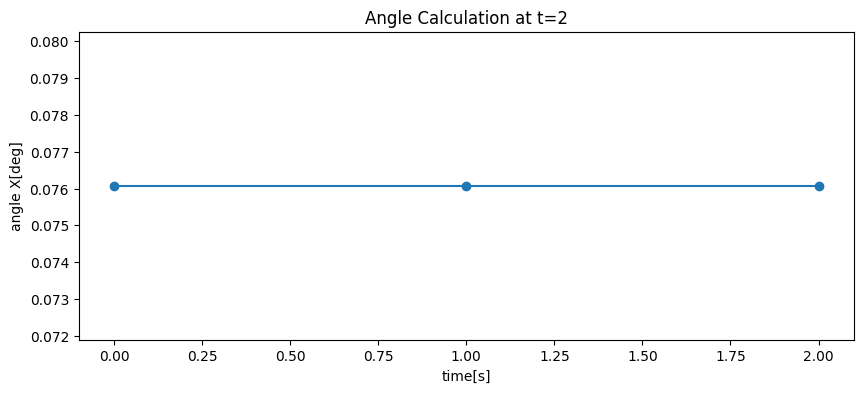

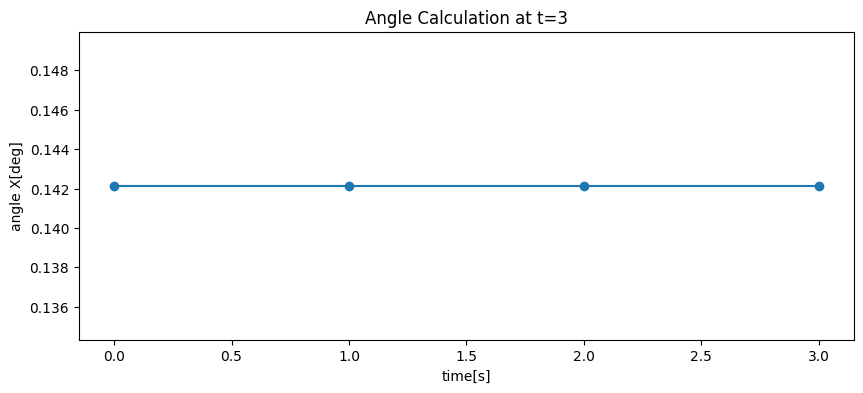

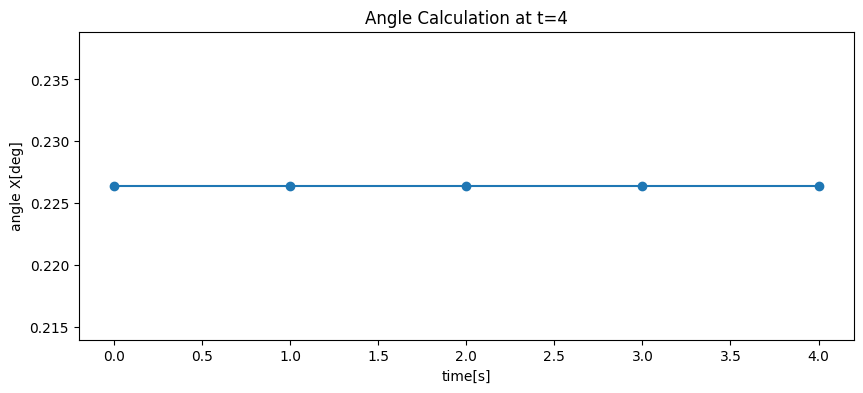

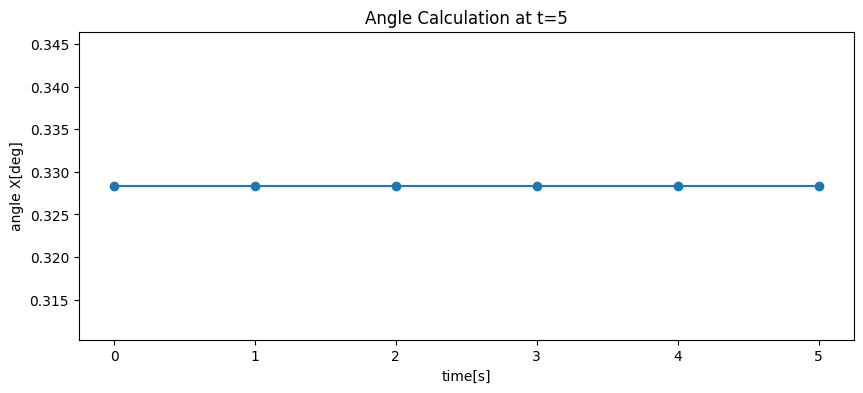

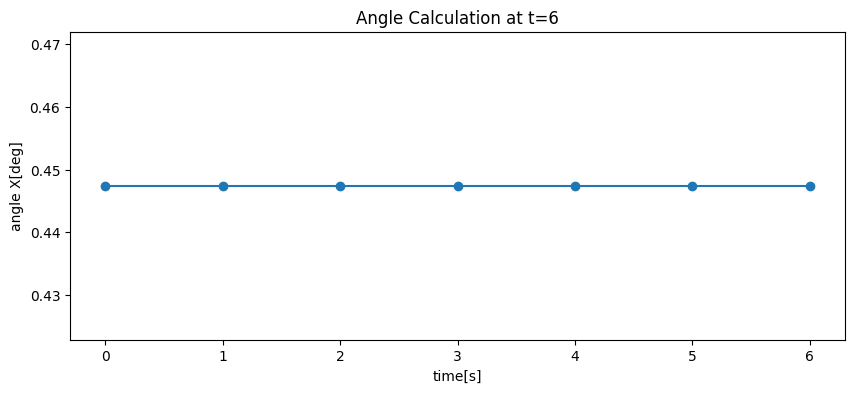

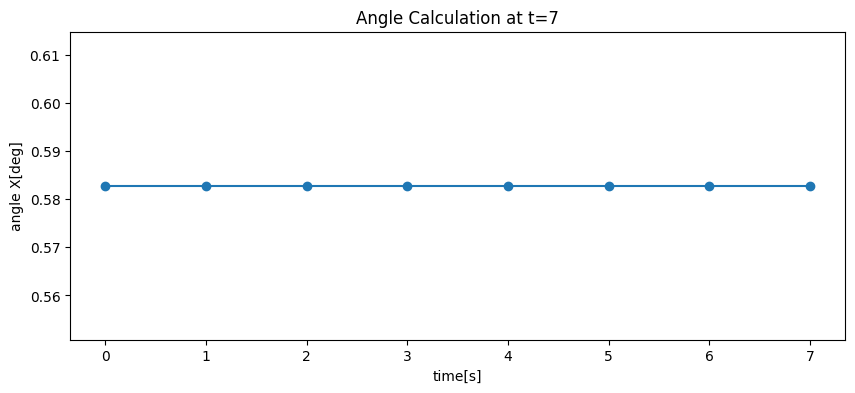

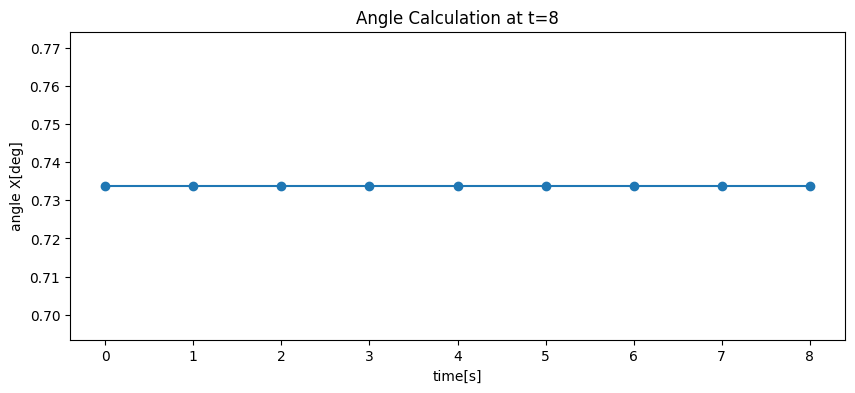

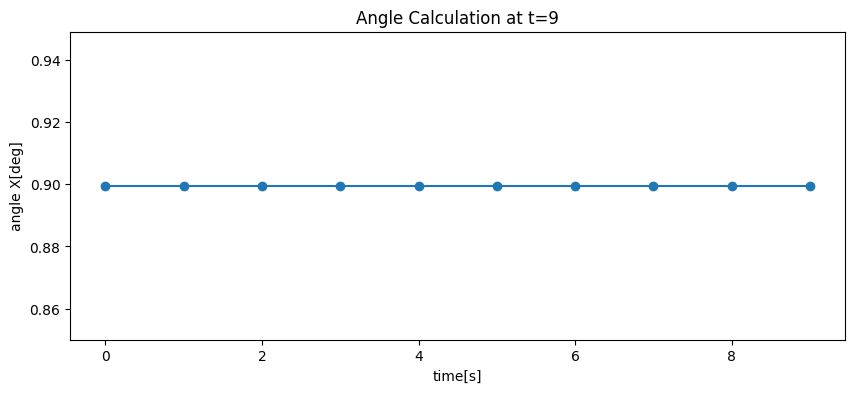

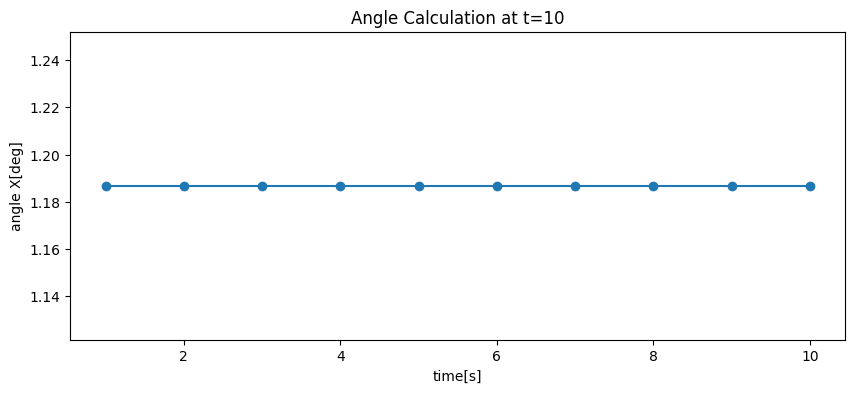

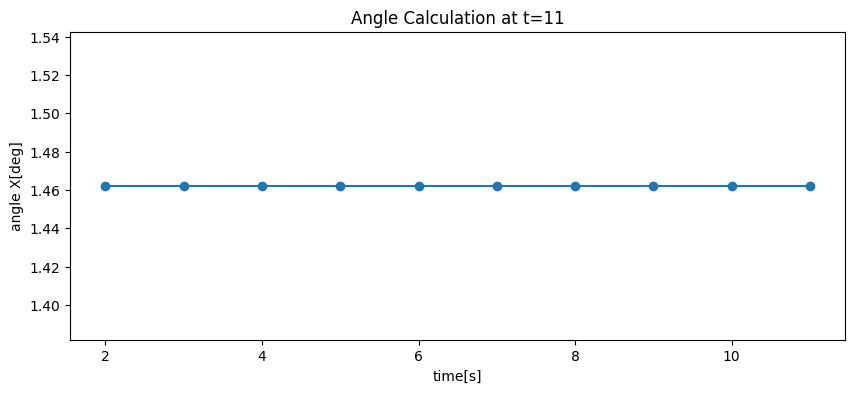

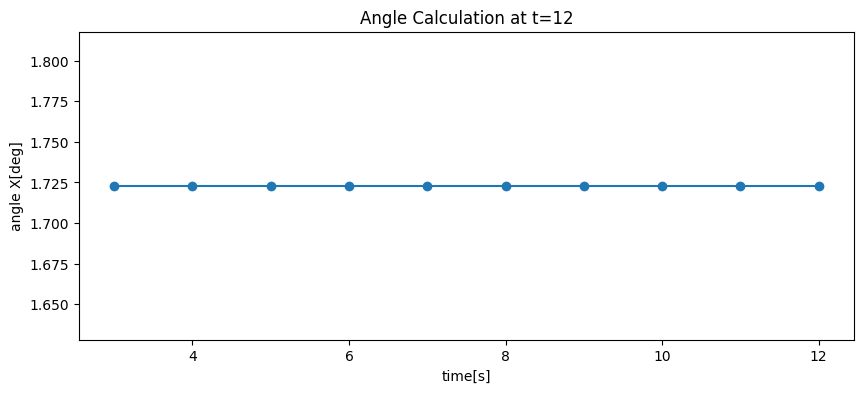

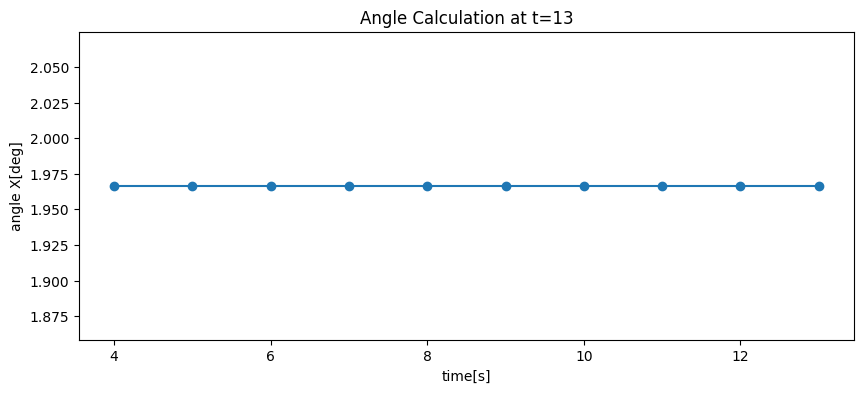

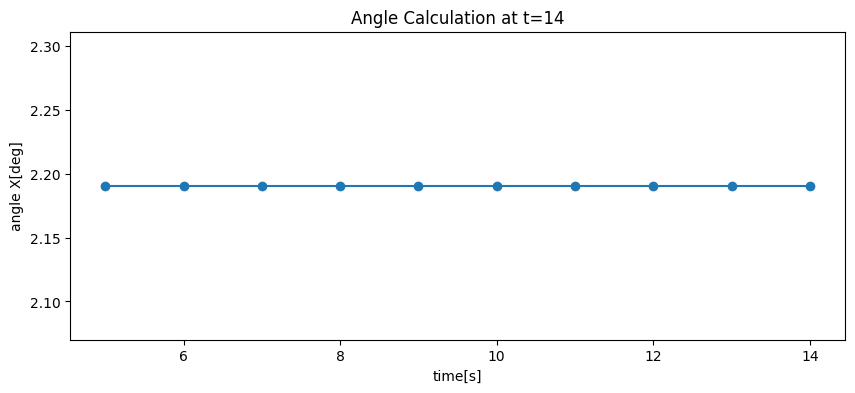

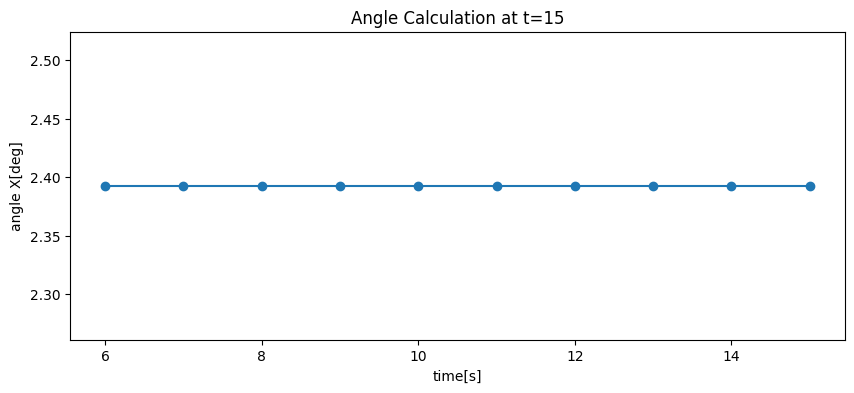

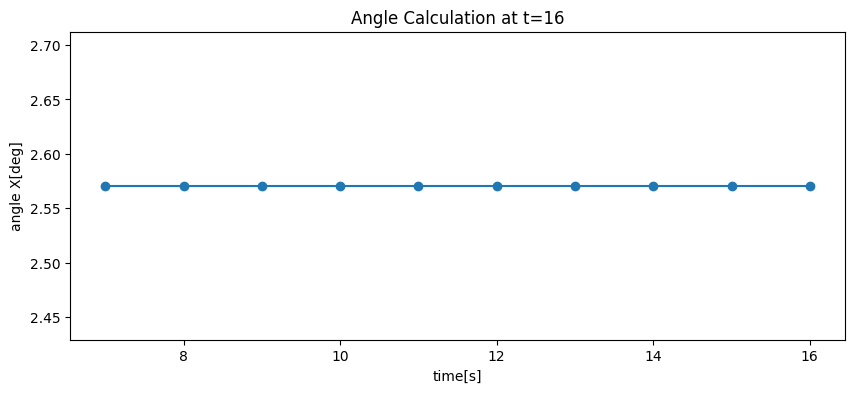

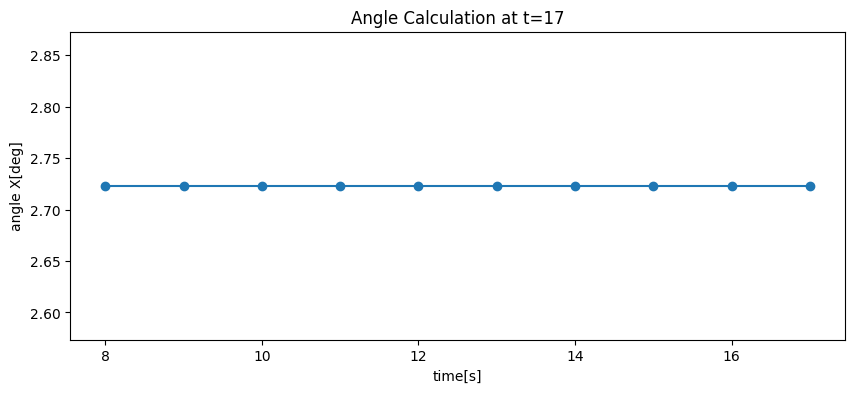

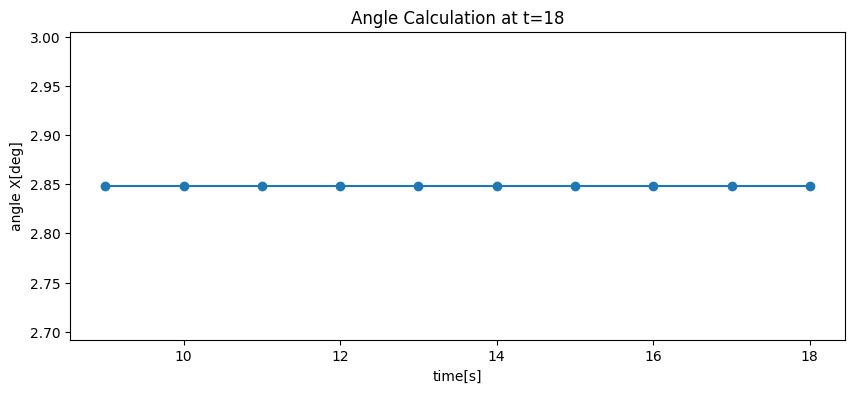

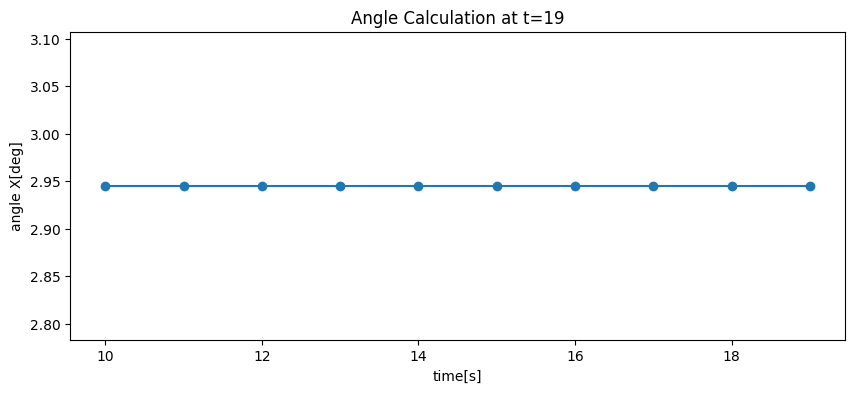

In [1]:
import pandas as pd
import numpy as np
from collections import deque
import matplotlib.pyplot as plt


# シミュレーション用にデータを生成
def generate_gyro_data(start_time, n_points=1):
    t = np.linspace(start_time, start_time + n_points - 1, n_points)
    x = np.sin(t * 0.1)
    y = np.cos(t * 0.1)
    z = np.sin(t * 0.1) * np.cos(t * 0.1)
    return pd.DataFrame({"t": t, "x": x, "y": y, "z": z})


# 角度の計算関数
def calculate_cumulative_angle(df, sample_freq=100, window_gayo=120):
    df["norm"] = (df["x"] ** 2 + df["y"] ** 2 + df["z"] ** 2) ** (1 / 2)
    df["angle"] = np.cumsum(df["x"]) / sample_freq
    df["low_x"] = df["x"].rolling(window=window_gayo, min_periods=1).mean()
    df["angle_x"] = df["angle"].rolling(
        window=window_gayo, center=True, min_periods=1
    ).mean() * (180 / np.pi)
    return df


# データバッファの初期化
buffer_size = 10  # 10秒分のデータをバッファリング
data_buffer = deque(maxlen=buffer_size)
start_time = 0

# データのシミュレーション
for i in range(20):  # 20秒分のデータをシミュレート
    new_data = generate_gyro_data(start_time, 1)
    data_buffer.append(new_data)
    start_time += 1

    # バッファ内のデータをDataFrameに変換
    df_buffer = pd.concat(data_buffer, ignore_index=True)

    # 角度の計算
    df_angle = calculate_cumulative_angle(df_buffer)

    # 角度のプロット
    plt.figure(figsize=(10, 4))
    plt.plot(df_angle["t"], df_angle["angle_x"], marker="o")
    plt.title(f"Angle Calculation at t={i}")
    plt.xlabel("time[s]")
    plt.ylabel("angle X[deg]")
    plt.show()